# Introduction

In this notebook, we will explore the Netflix dataset, which contains information about movies and TV shows available on the platform. Our goal is to analyze the data to uncover interesting patterns and insights. We will also attempt to predict trends in the content available on Netflix.

# Data Loading

Let's start by loading the necessary libraries and the dataset.

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [11]:
file_path = '/Users/swapnilgadage/Documents/DataAnalytics/Achivment 6/netflix_titles.csv'
df = pd.read_csv(file_path)

In [13]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [15]:
df.shape

(8807, 12)

# Data Cleaning and Preprocessing

Before diving into the analysis, we need to clean and preprocess the data. This includes handling missing values, converting data types, and extracting useful information from existing columns.

In [19]:
# Check for missing values
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [21]:
# Fill missing values
df['director'].fillna('Unknown', inplace=True)
df['cast'].fillna('Unknown', inplace=True)
df['country'].fillna('Unknown', inplace=True)
df['rating'].fillna('Unknown', inplace=True)
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['date_added'].fillna(df['date_added'].mode()[0], inplace=True)

In [23]:
# Verify changes
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        3
listed_in       0
description     0
dtype: int64

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      8807 non-null   object        
 4   cast          8807 non-null   object        
 5   country       8807 non-null   object        
 6   date_added    8807 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8807 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB


# Correlation heatmap

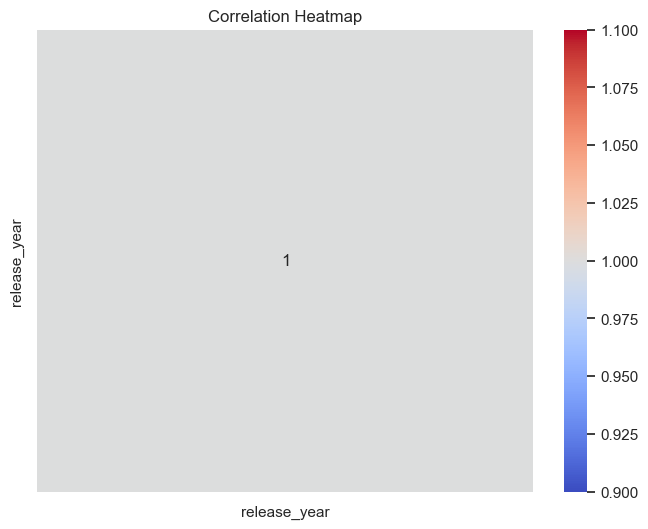

In [47]:
# Select numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Distribution of Content Types¶



We'll start by examining the distribution of movies and TV shows on Netflix.

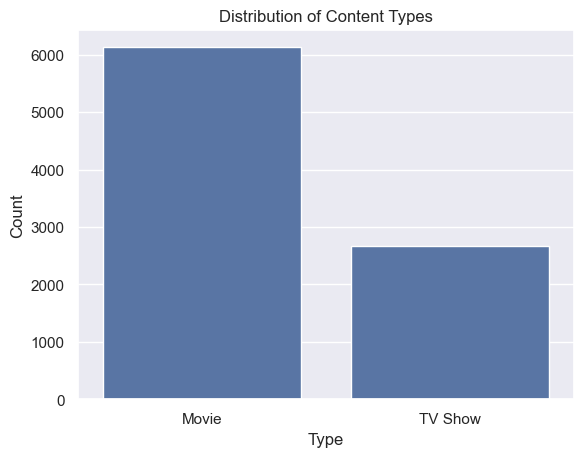

In [95]:
sns.countplot(data=df, x='type')
plt.title('Distribution of Content Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

 # Most watched content on Nexflix is Movie.

 # Now we will check top 10 Genres.

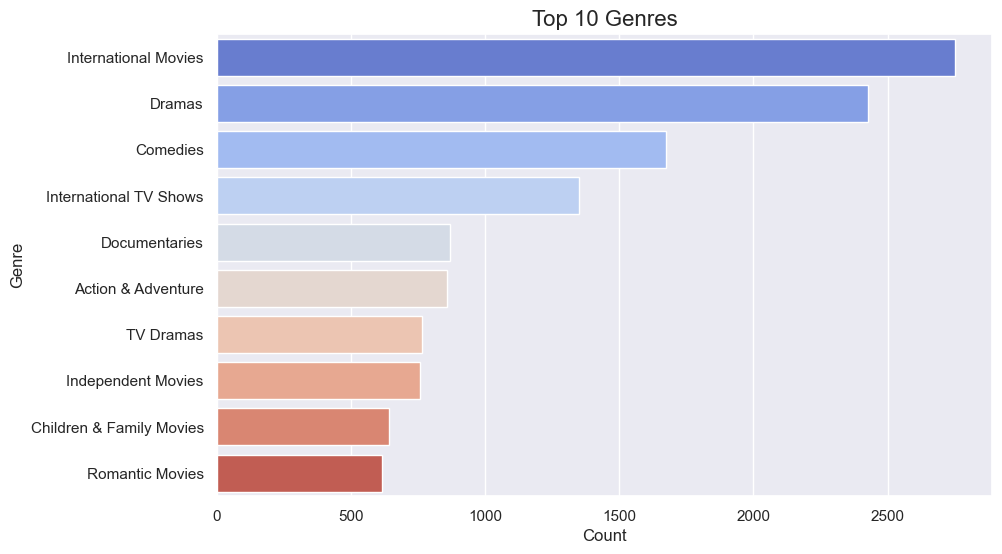

In [55]:
plt.figure(figsize=(10, 6))
genres = df['listed_in'].str.split(', ').explode()
top_genres = genres.value_counts().head(10)
sns.barplot(x=top_genres.values, y=top_genres.index, palette='coolwarm')
plt.title('Top 10 Genres', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.show()

# above graph will show the top 10 Genre.

 # Top 10 directors


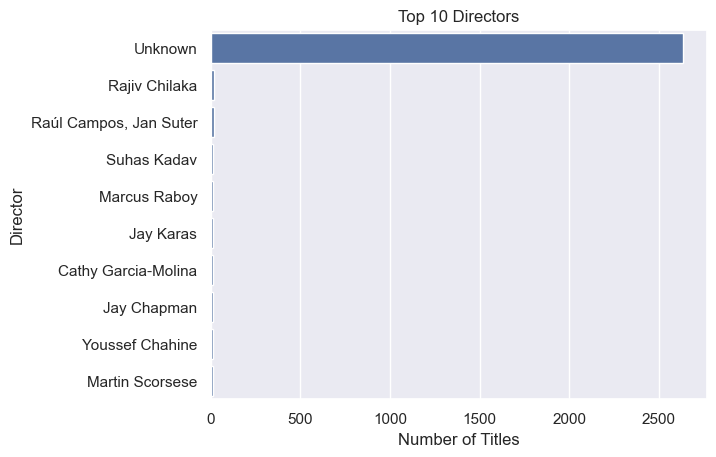

In [61]:
top_directors = df['director'].value_counts().head(10)
sns.barplot(y=top_directors.index, x=top_directors.values)
plt.title('Top 10 Directors')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.show()

 # Top 10 actors

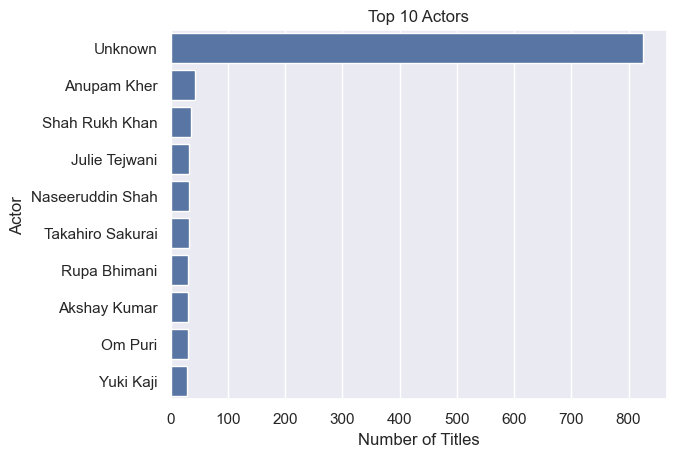

In [64]:
# Top 10 actors
top_actors = df['cast'].str.split(', ', expand=True).stack().value_counts().head(10)
sns.barplot(y=top_actors.index, x=top_actors.values)
plt.title('Top 10 Actors')
plt.xlabel('Number of Titles')
plt.ylabel('Actor')
plt.show()

# Top 10 country

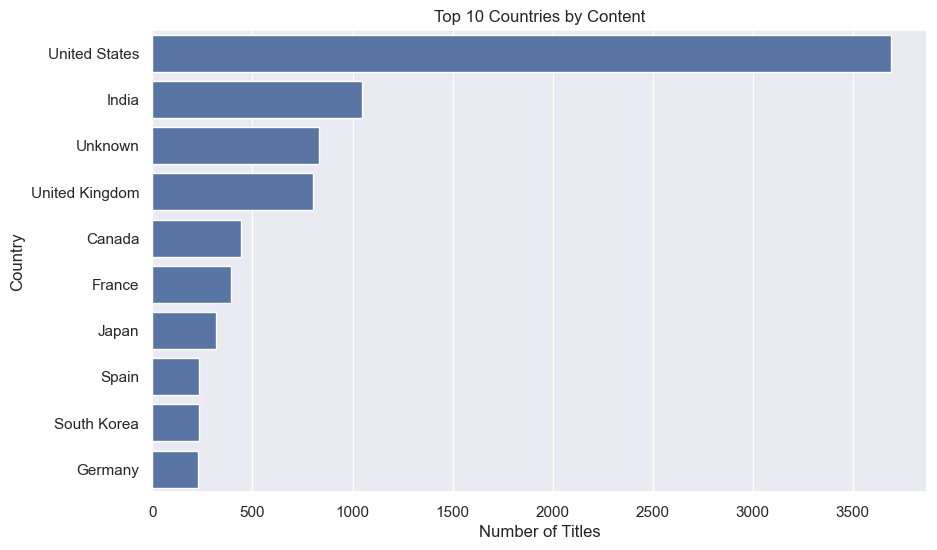

In [73]:
top_countries = df['country'].str.split(', ', expand=True).stack().value_counts().head(10)
sns.barplot(y=top_countries.index, x=top_countries.values)
plt.title('Top 10 Countries by Content')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()

# Reating distribution 

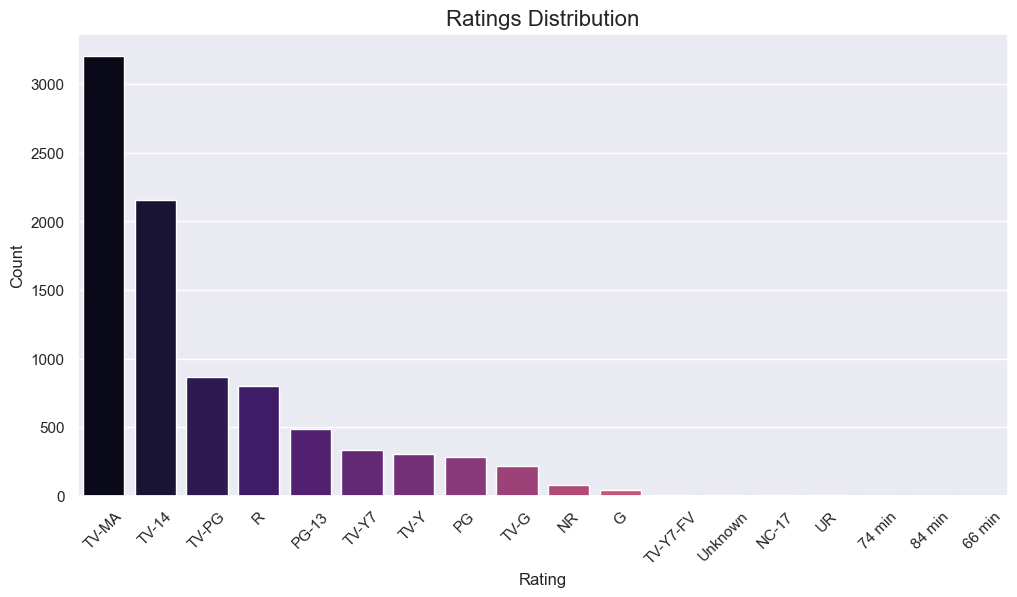

In [105]:
plt.figure(figsize=(12, 6))
rating_counts = df['rating'].value_counts()
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='magma')
plt.title('Ratings Distribution', fontsize=16)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [109]:
df["date_added"].dt.year.value_counts().plot(kind='bar')

<Axes: xlabel='date_added'>

# Content over the year.

Next, let's look at how the number of movies and TV shows has changed over the years.

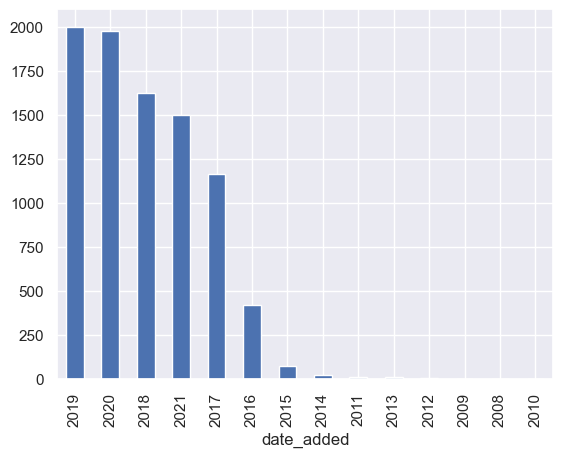

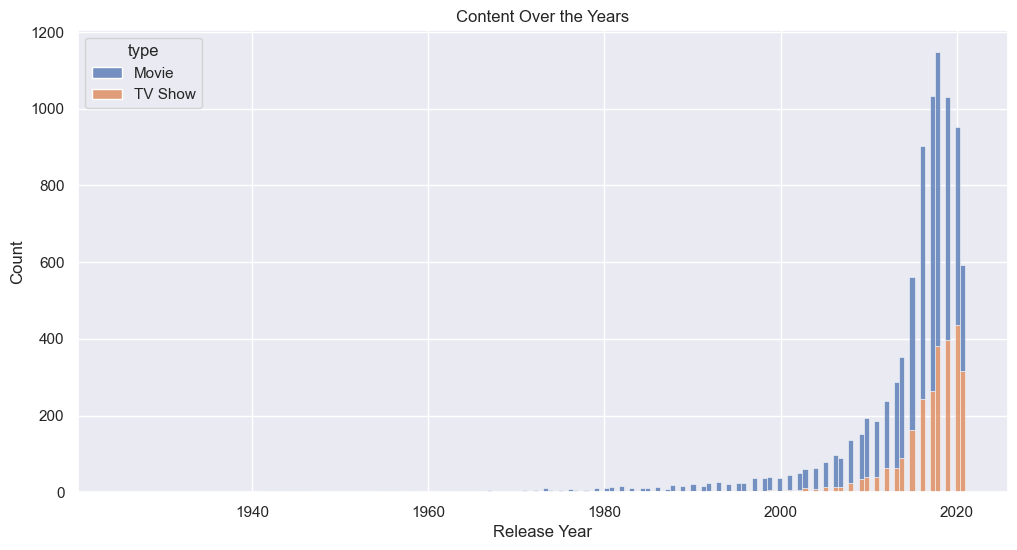

In [112]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='release_year', hue='type', multiple='stack')
plt.title('Content Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()

# Conclusion : 

In this notebook, we explored the Netflix dataset to uncover interesting patterns and insights. We analyzed the distribution of content types, top 10 genres, rating distribution ,trends over the years, top directors and actors, and content by country. We also performed a correlation analysis on the numeric columns.